# Story: DataByteSun: Cracking the Code of Car Prices

# Introduction
At DataByteSun, you were tasked with a challenge: to help a major automobile manufacturer understand the driving forces behind car prices. The stakes were high. With a volatile market and rising competition, identifying key price determinants would help the company fine-tune its offerings and boost profitability.

Your initial approach seemed straightforward—build a **Multiple Linear Regression (MLR)** model using the **Car Price Dataset**. This dataset contained a mix of numerical and categorical variables, representing key characteristics of the cars. But as your analysis unfolded, you realized that understanding car prices was far more complex than it appeared.

## - Import the library

In [1]:
# Import all required Libraries
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## - Load the dataset

In [2]:
# Import dataset
data = pd.read_csv('../Datasets/CarPrice.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## - Explore Data 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
   There are total of 205 record with  26 features where 8 are of float, 8 are integer, and 10 are objects.
</di>


In [4]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
   The features compressionratio, horsepower, price, enginesize have significant variation as after 75% data.
    Also, feature symboling is Categorical from description of data, need to convert it to categorical.
</div>

In [5]:
# COnverting symboling feature to categorical 
data['symboling'] = data['symboling'].astype('object')
data['symboling'].dtypes

dtype('O')

In [6]:
# dropping the 'car_ID' columns as not required
data = data.drop(['car_ID'], axis=1)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# Check for null value count
data.isnull().sum().any()

False

<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
   No missing value in data.
</di>


In [8]:
data.duplicated().any()

False

<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
   No duplicate records in data.
</di>


## - Data Distribution

Seperate Numerical and Categorical columns for further processing

In [9]:
# Seperate Numerical features 
data_num = data.select_dtypes(include= ['float64','int64'])
data_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# Seperate Categorical features 
data_cat = data.select_dtypes(exclude= ['float64','int64'])
data_cat.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


## - Visualization

In [11]:
target_col ='price'

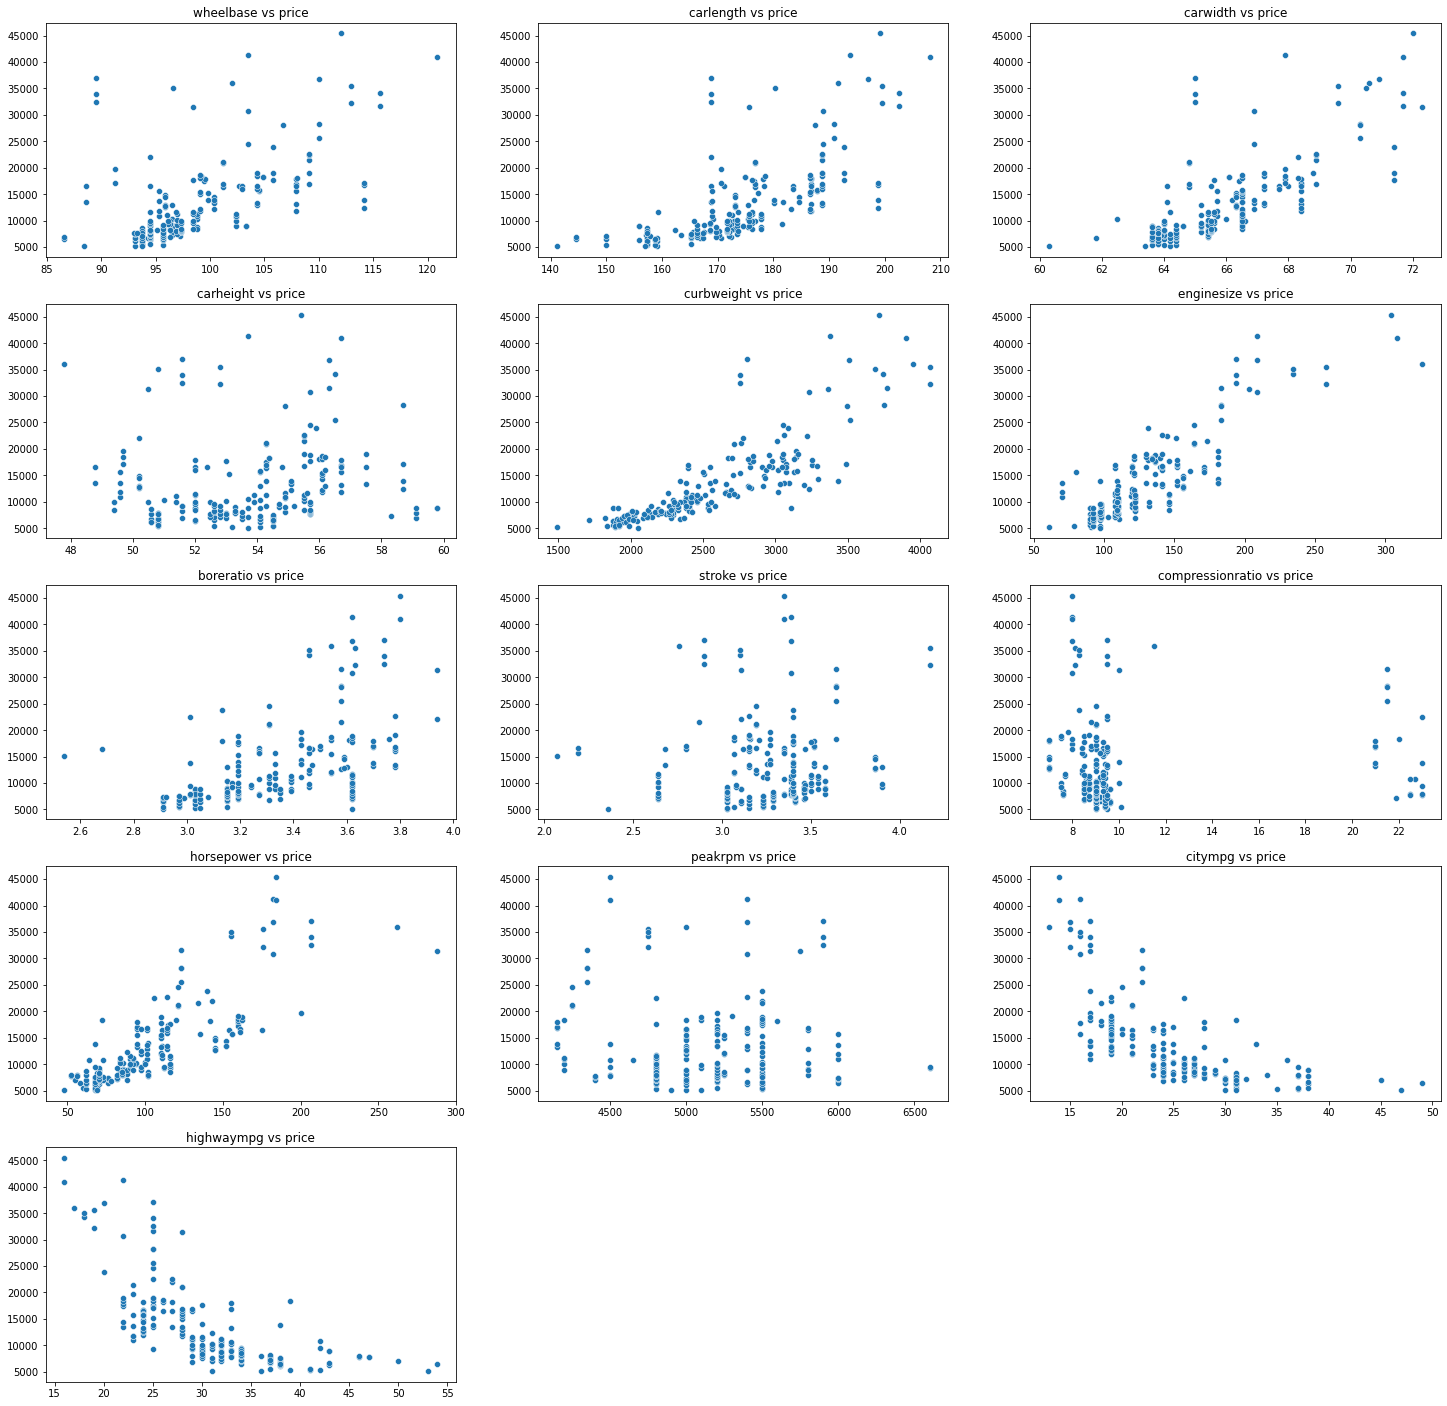

In [12]:
# Scatter PLot 
plt.figure(figsize=(25,25))

count = 1

for col in data_num.columns:
    if col!= target_col:
        plt.subplot(5,3,count)
        sns.scatterplot(x=data[col], y = data[target_col]).set(xlabel=None, ylabel=None)
        plt.title(col + " vs " + target_col)
        count += 1
plt.show()

<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
   Proof 1: The scatter plot's revealed there is a linear relationship of some of the features with the Price. (Linearity)
</di>

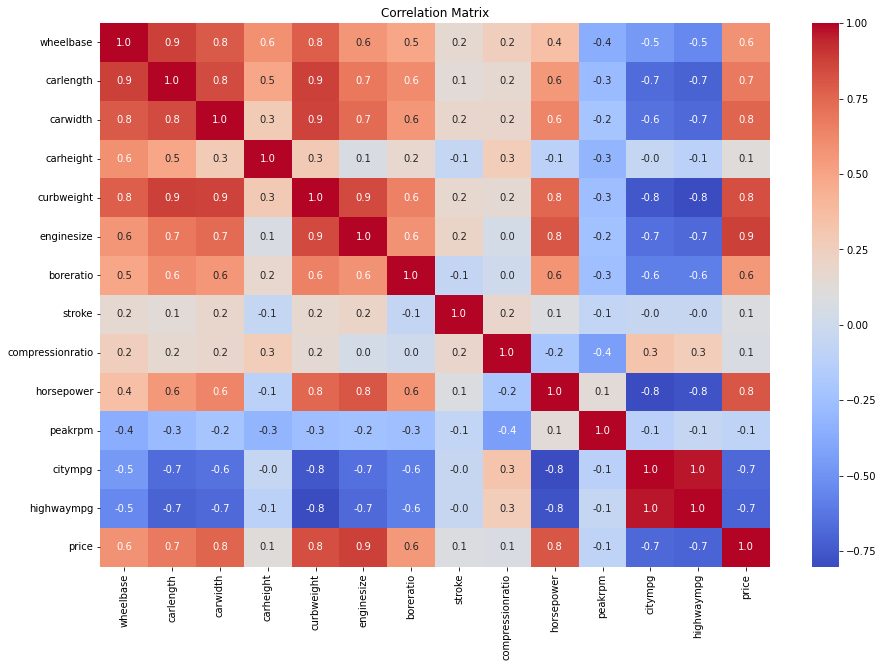

In [13]:
# Correlation MMatrix
correlation = data_num.corr()
correlation_with_target = correlation['price'].sort_values(ascending=False)

plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot= True, cmap='coolwarm' ,fmt='.1f')
plt.title('Correlation Matrix')
plt.show()

<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
   Many features like curbweight, enginesize, and horsepower were highly correlated.
</di>

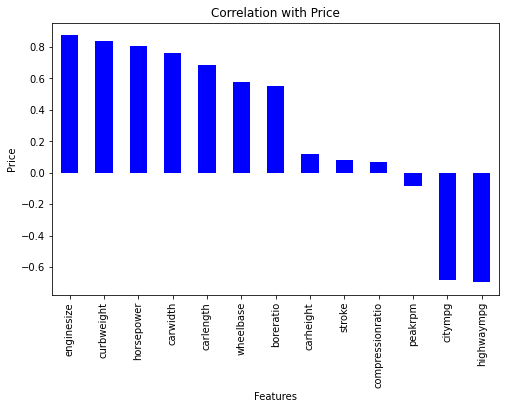

In [14]:
# Correlation with price
plt.figure(figsize=(8,5))
correlation_with_target.drop('price').plot(kind='bar', color='blue')
plt.title("Correlation with Price")
plt.xlabel('Features')
plt.ylabel('Price')
plt.show()

<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
   Proof 2: There is a strong positive and negative correlation between some of the variables. (Independence)
</di>

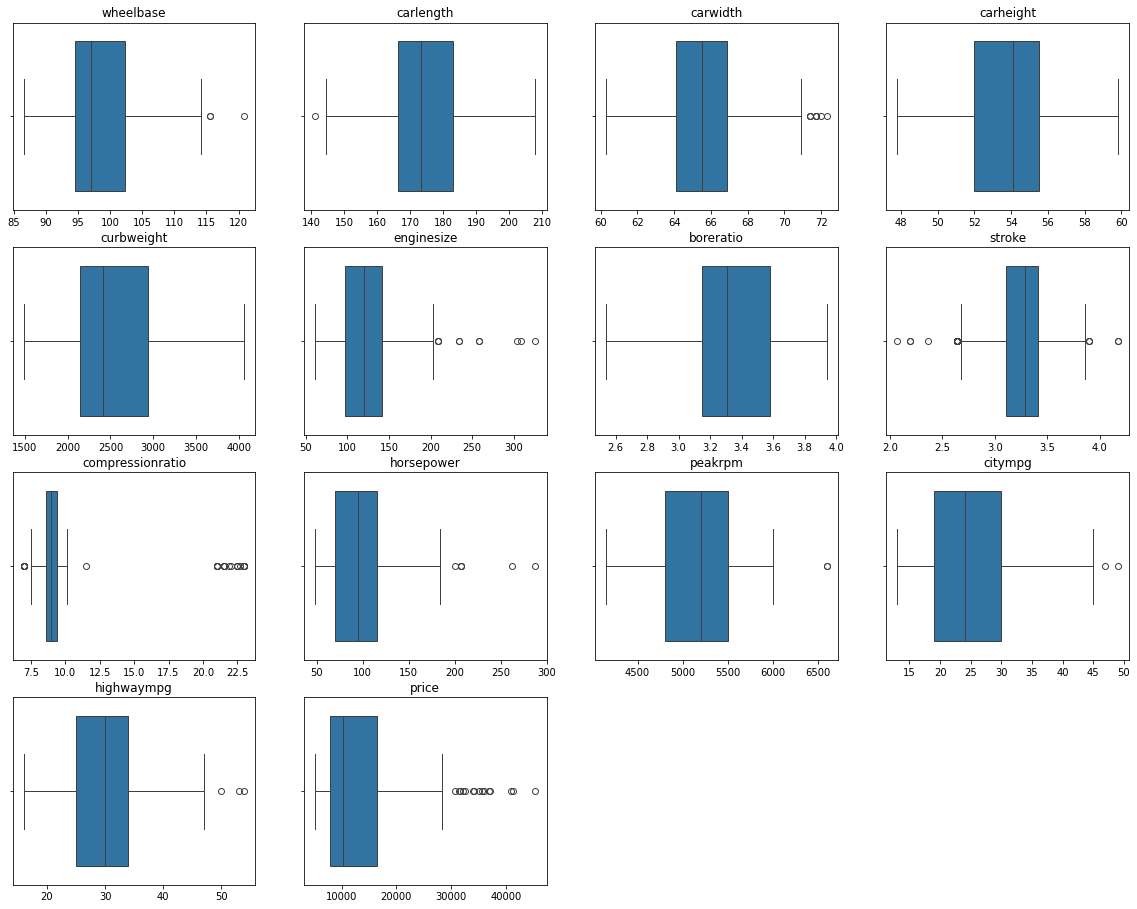

In [15]:
# Box plot of numerical features
plt.figure(figsize=(20,20))

count = 1

for col in data_num.columns:
    plt.subplot(5,4,count)
    sns.boxplot(x=data[col]).set(xlabel=None, ylabel=None)
    plt.title(col)
    count += 1
plt.show()

<div style="border: 2px dashed black; padding: 10px; font-size: 18px;">
  Outliers in features like price, horsepower, and enginesize could be valid data points (e.g., luxury cars or sports cars).
For variables like compressionratio, where extreme outliers don't align with natural ranges, consider capping these extreme points.
</di>

## Data Preprocessing

In [16]:
# Calculate Q1, Q3, and IQR
Q1 = data_num['compressionratio'].quantile(0.25)
Q3 = data_num['compressionratio'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
data_num['compressionratio'] = data_num['compressionratio'].clip(lower=lower_bound, upper=upper_bound)

In [17]:
# Scaling the numerical column
scaler = StandardScaler()
#scaler = MinMaxScaler()

cols = list(data_num.columns.values)

data_num[cols] = scaler.fit_transform(data_num[cols])
data_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.049433,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.049433,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.049433,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,1.214121,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-1.312986,0.275883,0.787855,-1.106241,-1.273900,0.523668


In [18]:
# Creating dummy variables for categorical variables
data_dummies = pd.get_dummies(data_cat, drop_first=True)
print("Shape", data_dummies.shape)

data_dummies.head()

Shape (205, 180)


,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [19]:
# Making the final clean dataset to build the model 
df=pd.concat([data_num, data_dummies],axis=1)
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.049433,0.174483,...,False,False,False,False,False,False,False,True,False,False
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.049433,0.174483,...,False,False,False,False,False,False,False,True,False,False
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.049433,1.264536,...,False,False,False,False,False,False,False,True,False,False
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,1.214121,-0.053668,...,False,False,False,False,False,False,False,True,False,False
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-1.312986,0.275883,...,False,False,False,False,False,False,False,True,False,False


## - Create a Multiple Linear Regression

In [20]:
X =df.drop([target_col], axis=1).values
y = df[target_col].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [21]:
# MLR Model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [22]:
# make predictions on the train set
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

In [23]:
# evaluate the model
print(f'The R-squared of the train set is {round(r2_score(y_train, y_train_pred), 2)}')
print(f'The R-squared of the test set is {round(r2_score(y_test, y_test_pred), 2)}')
print(f'The mean squared error of the train set is {round(mean_squared_error(y_train, y_train_pred), 2)}')
print(f'The mean squared error of the test set is {round(mean_squared_error(y_test, y_test_pred), 2)}')

The R-squared of the train set is 1.0
The R-squared of the test set is -9.66
The mean squared error of the train set is 0.0
The mean squared error of the test set is 11.63


#### --- Residual Analysis MLR

In [24]:
# Calculate residuals
res = y_test - y_test_pred

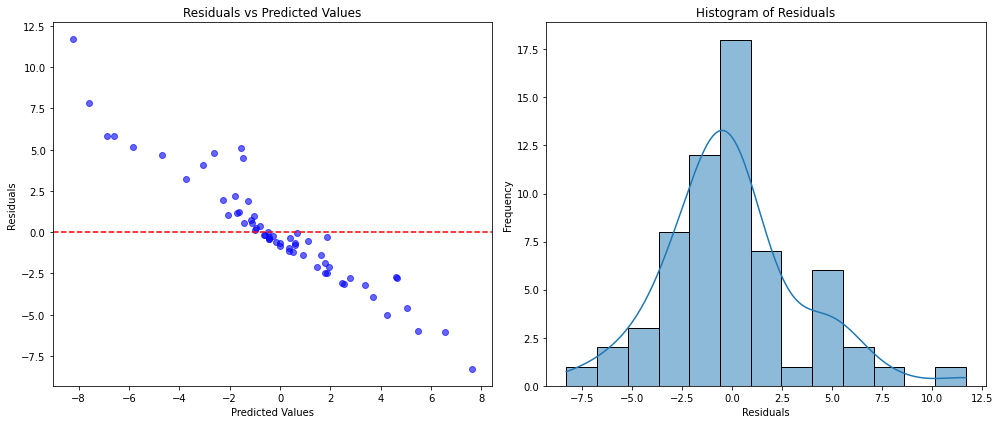

In [25]:
# Scatter plot of residuals
plt.figure(figsize=(14, 6))

# Scatter plot of residuals vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test_pred, res, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(res, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Show the plots
plt.tight_layout()
plt.show()

_________________________

<span style="font-family: 'Courier New'; font-size: 18px;">**Proof 3 Falied**: The residuals follow a Linear patterns. So, the asssumptions of Multiple Linear Regression are voilated. (Homoscedasticity) </span>

## The Challenge
After preprocessing the dataset (handling missing values, encoding categorical variables, and scaling numeric features),we built the MLR model. At first glance, the results were promising. The model explained a decent portion of the variance in car prices, but something felt off. A closer look at the output revealed:

1. Multicollinearity: Many features like curbweight, enginesize, and horsepower were highly correlated, leading to instability in the regression coefficients.
2. Overfitting: Despite a good fit on the training data, the model performed poorly on test data.

Clearly, MLR alone wasn’t enough to crack the code.

### Create a Lasso Regression

In [26]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True, verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [27]:
# Get the best model and results
print("Best cross-validation score: ", model_cv.best_score_)
print("Best parameters: ", model_cv.best_params_)

Best cross-validation score:  -0.2681720587992866
Best parameters:  {'alpha': 0.01}


In [28]:
# Lasso Model for best param
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [29]:
# make predictions on the train set
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

In [30]:
# evaluate the model
print(f'The R-squared of the train set is {round(r2_score(y_train, y_train_pred_lasso), 2)}')
print(f'The R-squared of the test set is {round(r2_score(y_test, y_test_pred_lasso), 2)}')
print(f'The mean squared error of the train set is {round(mean_squared_error(y_train, y_train_pred_lasso), 2)}')
print(f'The mean squared error of the test set is {round(mean_squared_error(y_test, y_test_pred_lasso), 2)}')

The R-squared of the train set is 0.91
The R-squared of the test set is 0.82
The mean squared error of the train set is 0.09
The mean squared error of the test set is 0.2


#### --- Residual Analysis Lasso

In [31]:
# Calculate residuals
res_lasso = y_test - y_test_pred_lasso

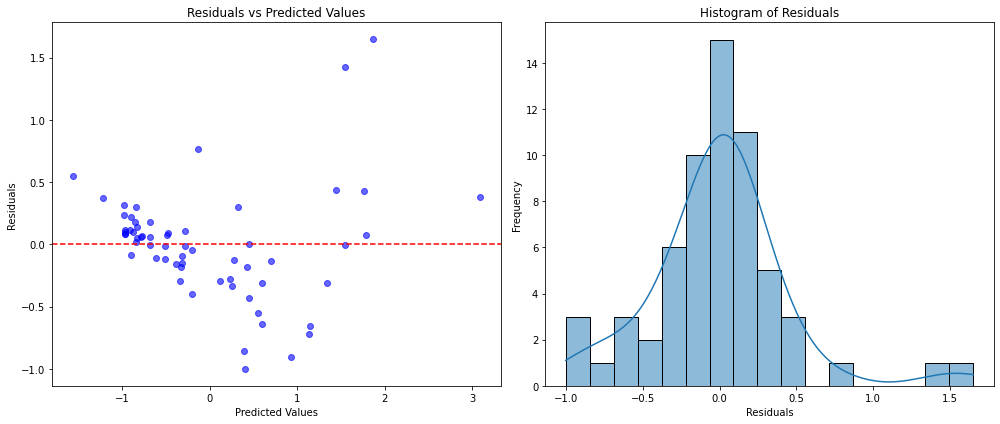

In [32]:
# Scatter plot of residuals
plt.figure(figsize=(14, 6))

# Scatter plot of residuals vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test_pred_lasso, res_lasso, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--') 
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(res_lasso, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Show the plots
plt.tight_layout()
plt.show()

<span style="font-family: 'Courier New'; font-size: 18px;">Proof 3: The residuals don't follow any patterns. So, the asssumptions of Lasso Regression are validated. (Homoscedasticity) </span>

# Conclusion
<span style="font-family: 'Arial'; font-size: 20px;"> Based on our comprehensive analysis, Lasso Regression generalize well and provides a better results over seen and unseen datasets. </span>

<div class="alert alert-block alert-success">
<b>END</b>
</div>